In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import distance_transform_edt, generic_filter

In [3]:
land_cover_np=np.load('/Users/bhoumik/Documents/Projects/Satellite CV Project/Datasets/land_cover.npy')

In [4]:
temp_cover_np=np.load('/Users/bhoumik/Documents/Projects/Satellite CV Project/Datasets/temp_cover.npy')

In [5]:
land_cover=torch.tensor(land_cover_np)

In [6]:
temp_cover=torch.tensor(temp_cover_np)

In [7]:
land_cover

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1],
        [0, 0, 0,  ..., 1, 1, 1]], dtype=torch.int32)

In [8]:
temp_cover

tensor([[16.1153, 16.1153, 16.0264,  ..., 15.3872, 15.4009, 15.4009],
        [16.1153, 16.1153, 16.0264,  ..., 15.3872, 15.4009, 15.4009],
        [16.1153, 16.1153, 16.0264,  ..., 15.3872, 15.4009, 15.4009],
        ...,
        [15.9478, 15.9478, 16.1768,  ..., 14.3584, 14.3140, 14.3140],
        [15.9478, 15.9478, 16.1768,  ..., 14.3584, 14.3140, 14.3140],
        [15.9478, 15.9478, 16.1768,  ..., 14.3584, 14.3140, 14.3140]])

In [9]:
temp_cover.shape

torch.Size([964, 3066])

In [10]:
import matplotlib.pyplot as plt
import torch

def disp_temp(temperature_data):

    if not isinstance(temperature_data, torch.Tensor):
        raise ValueError("temperature_data must be a PyTorch tensor")

    if temperature_data.dim() != 2:
        raise ValueError("temperature_data must be a 2D tensor")

    plt.imshow(temperature_data, cmap='hot', interpolation='nearest', vmin=10, vmax=50)
    plt.colorbar(label='Temperature')
    plt.title('Land Surface Temperature')
    plt.show()

def disp_land(tensor):
   
    if tensor.dim() != 2:
        raise ValueError("Tensor must be 2D.")
    
    plt.imshow(tensor, cmap='gray')
    plt.colorbar()
    plt.show()


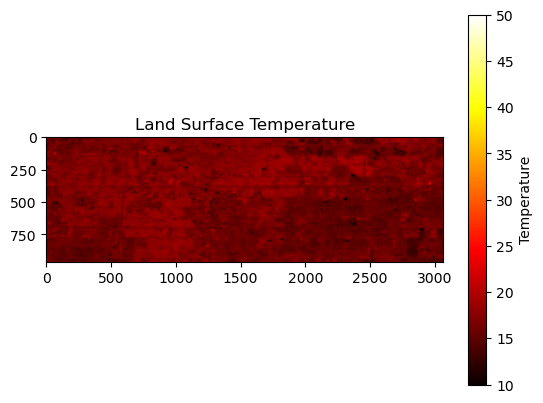

In [11]:
disp_temp(temp_cover)

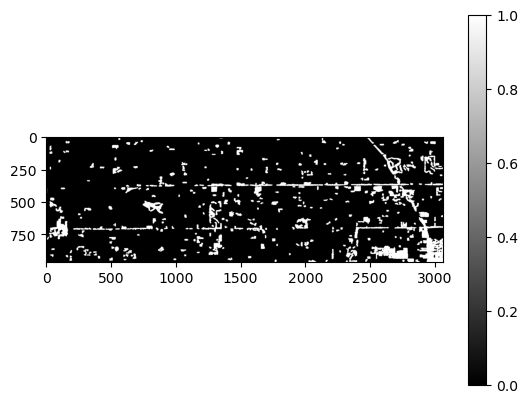

In [12]:
disp_land(land_cover)

In [13]:
land_cover.shape

torch.Size([964, 3066])

In [14]:
import torch
import numpy as np
from scipy.ndimage import label

land_cover_np = land_cover.numpy() 

labeled_array, num_vacant_pieces = label(land_cover_np)

print(f"Number of distinct vacant pieces of land: {num_vacant_pieces}")

Number of distinct vacant pieces of land: 344


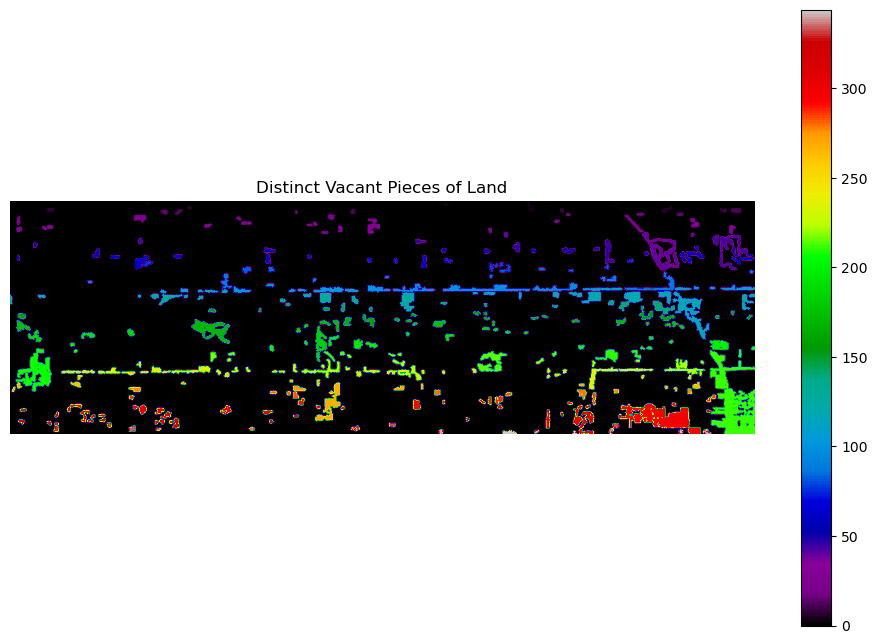

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.imshow(labeled_array, cmap='nipy_spectral')   
plt.colorbar()  
plt.title('Distinct Vacant Pieces of Land')
plt.axis('off')  
plt.show()

In [16]:
labeled_array

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 212, 212, 212],
       [  0,   0,   0, ..., 212, 212, 212],
       [  0,   0,   0, ..., 212, 212, 212]], dtype=int32)

In [17]:
import numpy as np

def find_large_vacant_lands_labels_and_sizes(labeled_array, min_size=100):
    """
    Find the labels and sizes of all vacant lands greater than a specified size.
    
    Parameters:
    - labeled_array: A 2D numpy array where each distinct vacant land area is labeled with a unique integer.
    - min_size: The minimum size (in pixels) to consider a vacant land area as large.
    
    Returns:
    - A dictionary where keys are labels of vacant lands larger than the specified size, 
      and values are the sizes of these lands.
    """
    
    area_sizes = np.bincount(labeled_array.flatten())
    
    large_labels = np.where(area_sizes > min_size)[0]
    
    large_vacant_lands_labels_and_sizes = {label: area_sizes[label] for label in large_labels if label != 0} 
    
    return large_vacant_lands_labels_and_sizes

large_labels_and_sizes = find_large_vacant_lands_labels_and_sizes(labeled_array, 1000)
print("Labels of vacant lands larger than 1000 pixels and their sizes:")
for label, size in large_labels_and_sizes.items():
    print(f"Label: {label}, Size: {size} pixels")
len(large_labels_and_sizes)

Labels of vacant lands larger than 1000 pixels and their sizes:
Label: 20, Size: 1379 pixels
Label: 21, Size: 1219 pixels
Label: 32, Size: 1309 pixels
Label: 40, Size: 8835 pixels
Label: 44, Size: 5373 pixels
Label: 47, Size: 2040 pixels
Label: 59, Size: 1282 pixels
Label: 68, Size: 1600 pixels
Label: 88, Size: 3836 pixels
Label: 89, Size: 1448 pixels
Label: 96, Size: 2835 pixels
Label: 97, Size: 2725 pixels
Label: 99, Size: 5837 pixels
Label: 101, Size: 1776 pixels
Label: 103, Size: 1190 pixels
Label: 104, Size: 2110 pixels
Label: 106, Size: 1061 pixels
Label: 107, Size: 1868 pixels
Label: 117, Size: 1668 pixels
Label: 118, Size: 8972 pixels
Label: 119, Size: 2647 pixels
Label: 120, Size: 2399 pixels
Label: 126, Size: 3351 pixels
Label: 127, Size: 1837 pixels
Label: 131, Size: 1695 pixels
Label: 133, Size: 1547 pixels
Label: 141, Size: 2443 pixels
Label: 142, Size: 1025 pixels
Label: 154, Size: 1273 pixels
Label: 159, Size: 1311 pixels
Label: 170, Size: 7470 pixels
Label: 174, Size: 1

56

In [17]:
def plot_vacant_land_area(labeled_array, label_number):
    vacant_land_mask = (labeled_array == label_number)
    
    area_size = np.sum(vacant_land_mask)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(vacant_land_mask, cmap='gray')
    plt.title(f'Vacant Land Area with Label {label_number}, Size: {area_size} pixels')
    plt.axis('on') 
    plt.show()
    return vacant_land_mask


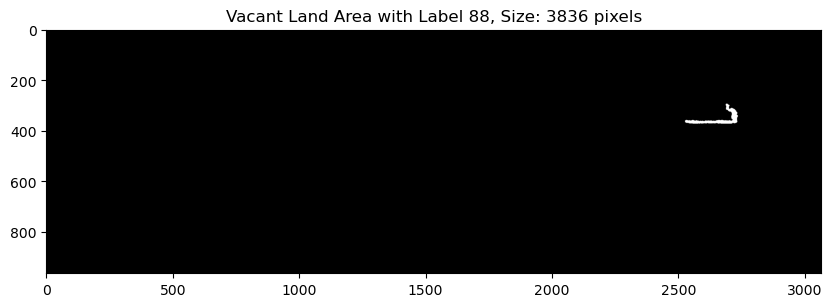

In [18]:
vacant_land_mask=plot_vacant_land_area(labeled_array,88)

In [19]:
vacant_land_tensor = torch.from_numpy(vacant_land_mask.astype(int))

In [20]:
import numpy as np

def remove_large_vacant_lands(labeled_array, max_size=1000):
    
    area_sizes = np.bincount(labeled_array.flatten())
    
    large_labels = np.where(area_sizes > max_size)[0]
    
    for label in large_labels:
        if label != 0:  
            labeled_array[labeled_array == label] = 0
            
    return labeled_array

modified_labeled_array = remove_large_vacant_lands(labeled_array, 1000)


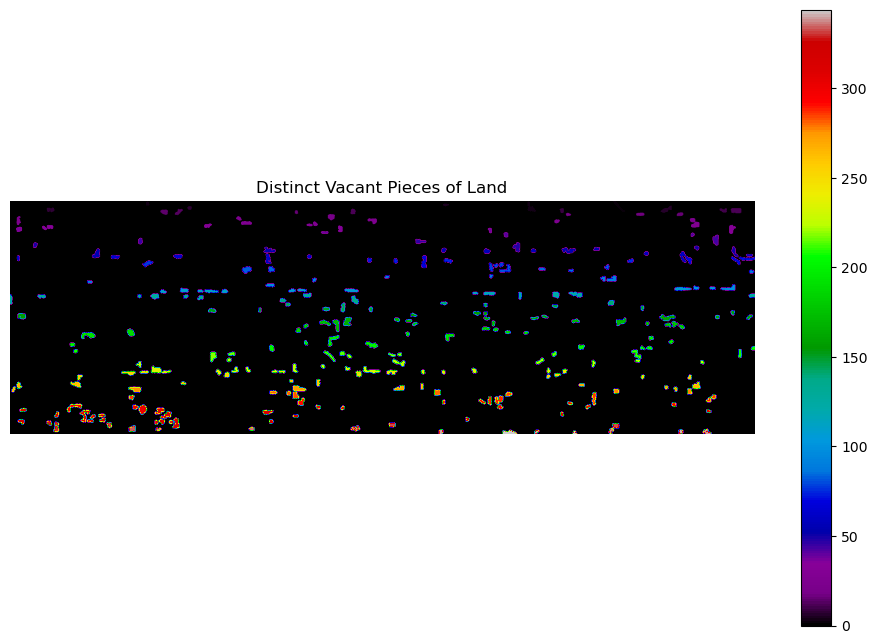

In [21]:
plt.figure(figsize=(12, 8))
plt.imshow(modified_labeled_array, cmap='nipy_spectral')  
plt.colorbar()  
plt.title('Distinct Vacant Pieces of Land')
plt.axis('off')  
plt.show()

In [22]:
from scipy.ndimage import label

re_labeled_array, num_features = label(modified_labeled_array > 0)

print(f"Total number of distinct vacant lands after removal and re-labeling: {num_features}")


Total number of distinct vacant lands after removal and re-labeling: 288


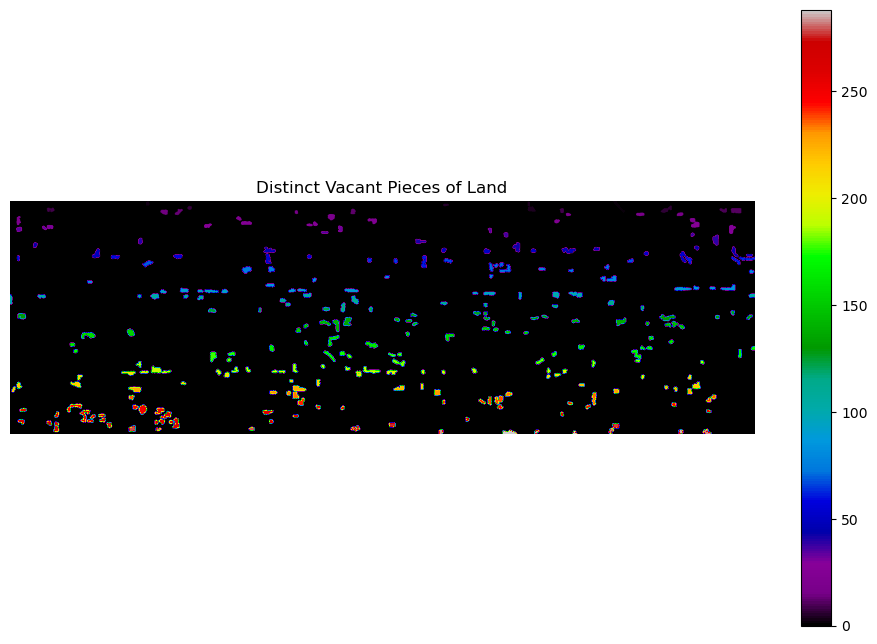

In [23]:
plt.figure(figsize=(12, 8))
plt.imshow(re_labeled_array, cmap='nipy_spectral') 
plt.colorbar()  
plt.title('Distinct Vacant Pieces of Land')
plt.axis('off')  
plt.show()

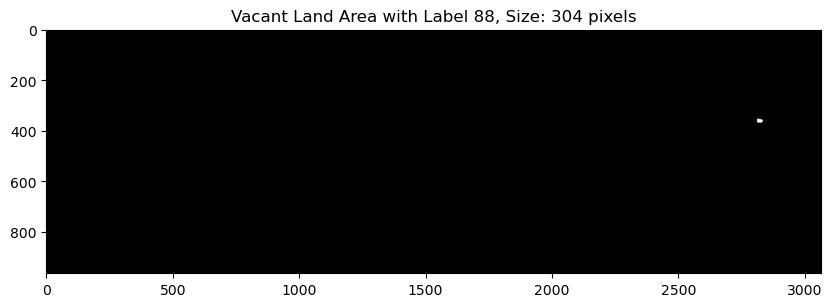

In [24]:
vacant_land_mask=plot_vacant_land_area(re_labeled_array,88)

In [25]:
vacant_land_tensor = torch.from_numpy(vacant_land_mask.astype(int))

In [26]:
vacant_land_tensor

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

In [27]:
temp_cover2=temp_cover*2
temp_cover2.shape

torch.Size([964, 3066])

In [28]:
import torch

def calculate_new_heat_map(land, heat_map):
    k, x0, alpha = torch.tensor(0.4), torch.tensor(25), torch.tensor(1)
    S = torch.sum(land == 1).float()
    
    distances_pixels = torch.from_numpy(distance_transform_edt(1 - land.cpu().numpy()))
    distances_meters = torch.minimum(distances_pixels * 10, torch.tensor(900.0))
    cooling_effect = (6 / (1 + torch.exp(-k * (temp_cover2 - x0 + alpha * torch.log(S))))) * torch.minimum(torch.tensor(1),((5.76 - 0.847 * torch.log(torch.maximum(distances_meters, torch.tensor(0.001))))/5.76))
    cooling_effect = torch.where((land == 0) & (distances_meters < 900), cooling_effect, torch.tensor(0.0))
    
    forest_cooling_effect = 6 / (1 + torch.exp(-k * (heat_map - x0 + alpha * torch.log(S))))
    combined_effect = torch.where(land == 1, forest_cooling_effect, cooling_effect)
    
    new_heat_map = heat_map - combined_effect
    
    return new_heat_map

new_heat_map = calculate_new_heat_map(vacant_land_tensor, temp_cover2)


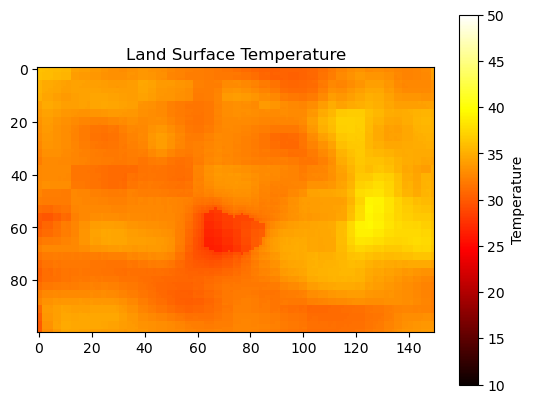

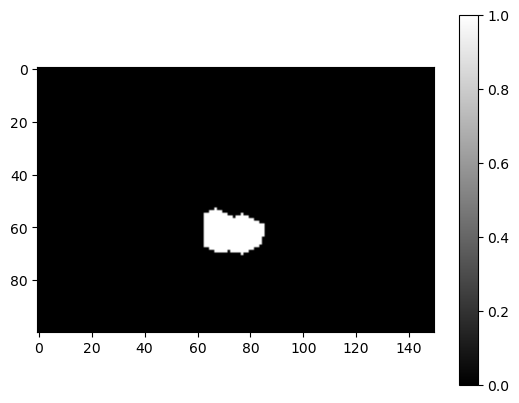

In [29]:
disp_temp(new_heat_map[300:400,2750:2900])
disp_land(vacant_land_tensor[300:400,2750:2900])

In [30]:
new_heat_map[300:400,2750:2900].mean()

tensor(33.0964, dtype=torch.float64)

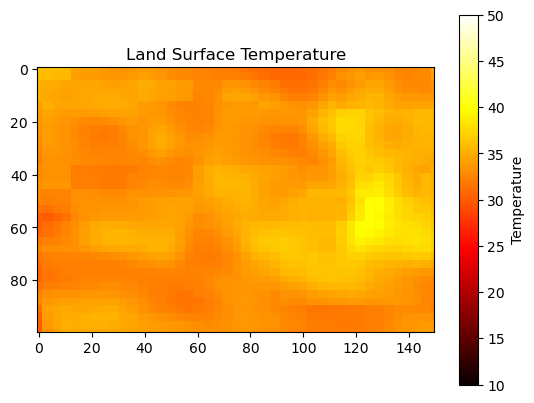

tensor(34.0688)

In [31]:
disp_temp(temp_cover2[300:400,2750:2900])
temp_cover2[300:400,2750:2900].mean()

In [32]:
import numpy as np
from scipy.ndimage import distance_transform_edt

def allocate_forest_area(land, heat_map, total_area):
    cumulative_cooling_effect = np.zeros_like(heat_map)
    selected_vacant_lands = []

    while total_area > 0:
        vacant_ids = np.unique(land[land > 0])
        if len(vacant_ids) == 0:
            break  # No more vacant lands to consider
        
        filtered_vacant_ids = [vid for vid in vacant_ids if np.sum(land == vid) <= total_area]
        
        best_vacant_id = None
        highest_mean_temp = -np.inf
        
        for vacant_id in filtered_vacant_ids:
            mean_temp = calculate_mean_temperature(land, heat_map, vacant_id)
            if mean_temp > highest_mean_temp:
                highest_mean_temp = mean_temp
                best_vacant_id = vacant_id
        print(best_vacant_id)
        if best_vacant_id is None:
            break  # No suitable vacant land found within the remaining area

        vacant_land_size = np.sum(land == best_vacant_id)
        heat_map, cumulative_cooling_effect = update_heat_map(land, heat_map, best_vacant_id, cumulative_cooling_effect)
        print("updated")
        land[land == best_vacant_id] = 0
        total_area -= vacant_land_size
        selected_vacant_lands.append(best_vacant_id)
            
    return land, heat_map, selected_vacant_lands, total_area

def calculate_mean_temperature(land, heat_map, vacant_id):
    """
    Calculate the mean temperature for the given vacant land and its 900m buffer zone.
    """
    mask = land == vacant_id
    distances = distance_transform_edt(~mask) * 10  # Assuming 10m per pixel
    buffer_mask = distances <= 900
    return np.mean(heat_map[buffer_mask])

import numpy as np
from scipy.ndimage import distance_transform_edt

def update_heat_map(land, heat_map, selected_vacant_id, cumulative_cooling_effect):
    """
    Simulate afforestation by updating the heat map based on the cooling effect of planting trees,
    ensuring the cumulative cooling effect for each pixel does not exceed 6 degrees Celsius.
    """
    k, x0, alpha = 0.4, 25, 1  # Define constants
    S = np.sum(land == selected_vacant_id)  # Area of the selected vacant land
    
    distances_pixels = distance_transform_edt(land != selected_vacant_id) * 10  # Distance in meters
    distances_meters = np.clip(distances_pixels, None, 900)  # Limiting to 900 meters
    
    cooling_effect = (6 / (1 + np.exp(-k * (heat_map - x0 + alpha * np.log(S))))) * np.minimum(1, ((5.76 - 0.847 * np.log(np.maximum(distances_meters, 0.001))) / 5.76))
    cooling_effect = np.where((land != selected_vacant_id) & (distances_meters <= 900), cooling_effect, 0)
    
    forest_cooling_effect = 6 / (1 + np.exp(-k * (heat_map[land == selected_vacant_id] - x0 + alpha * np.log(S))))
    
    new_cooling_effect = np.zeros_like(heat_map)
    new_cooling_effect[land == selected_vacant_id] = forest_cooling_effect
    new_cooling_effect += cooling_effect  # Include buffer zone cooling effect
    
    effective_cooling = np.minimum(6 - cumulative_cooling_effect, new_cooling_effect)
    heat_map -= effective_cooling
    cumulative_cooling_effect += effective_cooling
    
    return heat_map, cumulative_cooling_effect



In [33]:
land=re_labeled_array.copy()
heat_map=temp_cover2.numpy().copy()

In [34]:
l,h,s,t=allocate_forest_area(land, heat_map, 20000)

61
updated
81
updated
47
updated
49
updated
176
updated
66
updated
115
updated
194
updated
280
updated
123
updated
65
updated
197
updated
41
updated
70
updated
109
updated
231
updated
75
updated
85
updated
23
updated
99
updated
93
updated
153
updated
67
updated
95
updated
177
updated
165
updated
48
updated
257
updated
28
updated
57
updated
50
updated
105
updated
76
updated
52
updated
170
updated
73
updated
217
updated
58
updated
15
updated
69
updated
5
updated
121
updated
32
updated
108
updated
110
updated
22
updated
74
updated
62
updated
128
updated
None


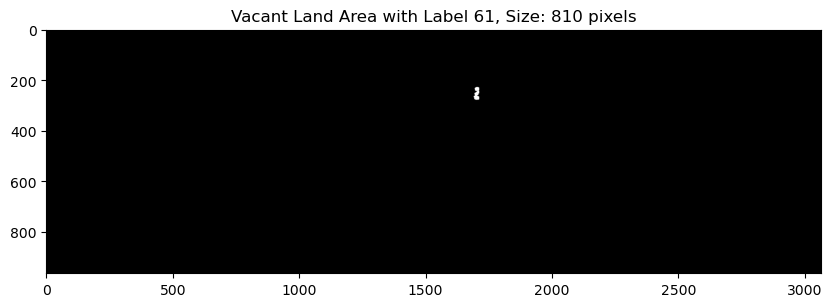

In [35]:
vacant_land_mask=plot_vacant_land_area(re_labeled_array,61)

In [36]:
temp_cover2.mean()

tensor(32.7247)

In [37]:
h.mean()

32.484905

In [38]:
heat_map_before=temp_cover2
heat_map_after=h

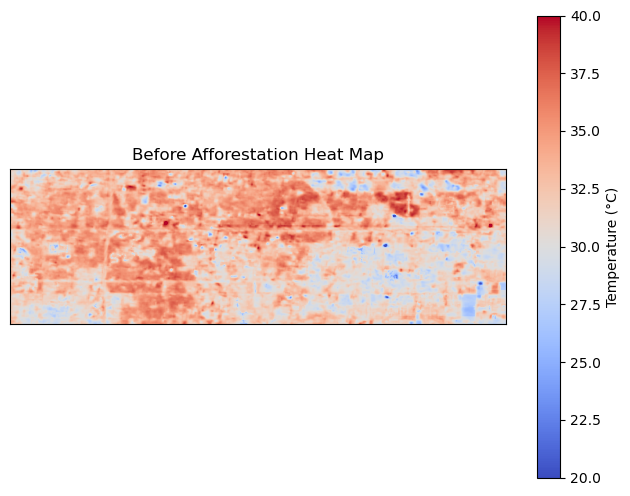

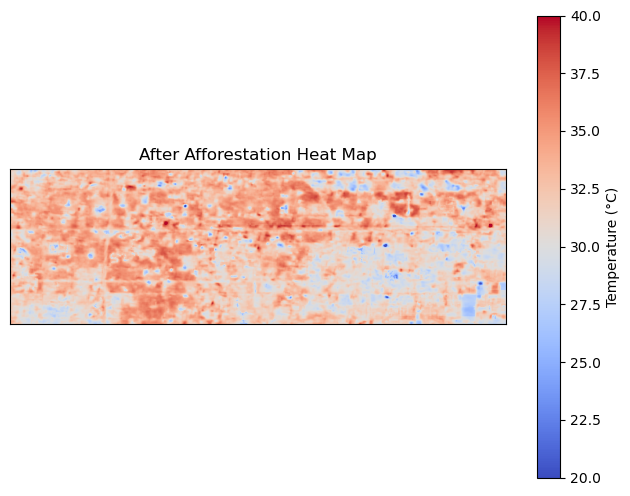

In [39]:
import matplotlib.colors as mcolors
def plot_heat_map(data, title, cmap='coolwarm', cbar_label='Temperature (°C)'):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    norm = mcolors.TwoSlopeNorm(vmin=20, vcenter=30, vmax=40)
    heatmap = plt.imshow(data, cmap=cmap, norm=norm)
    plt.colorbar(heatmap, label=cbar_label)
    plt.xticks([])  # Hide x ticks
    plt.yticks([])  # Hide y ticks
    plt.show()

plot_heat_map(heat_map_before, 'Before Afforestation Heat Map')
plot_heat_map(heat_map_after, 'After Afforestation Heat Map')

In [47]:
import numpy as np
from scipy.ndimage import distance_transform_edt

def mean_temperature_analysis(land, heat_map_before, heat_map_after, selected_vacant_lands, buffer=900):
    """
    Calculate the mean temperature for the given vacant land and its 900m buffer zone.
    Ensure all inputs are NumPy arrays for consistency.
    """
    if not isinstance(heat_map_before, np.ndarray):
        heat_map_before = np.array(heat_map_before)
    if not isinstance(heat_map_after, np.ndarray):
        heat_map_after = np.array(heat_map_after)
    if not isinstance(land, np.ndarray):
        land = np.array(land)

    results = []
    
    for vacant_id in selected_vacant_lands:
        mask = land == vacant_id
        if not np.any(mask):
            continue  # Skip if no land matches the vacant_id
        
        distances = distance_transform_edt(~mask) * 10  # Assuming each pixel represents 10m
        buffer_mask = distances <= buffer
        
        combined_mask = mask | buffer_mask
        
        mean_temp_before = np.mean(heat_map_before[combined_mask])
        mean_temp_after = np.mean(heat_map_after[combined_mask])
        
        results.append({
            'vacant_id': vacant_id,
            'mean_temp_before': mean_temp_before,
            'mean_temp_after': mean_temp_after,
            'temperature_change': mean_temp_before - mean_temp_after
        })
    
    return results

results = mean_temperature_analysis(re_labeled_array, heat_map_before, heat_map_after, s)
for result in results:
    print(f"Vacant Land ID {result['vacant_id']}: Mean Temp Before: {result['mean_temp_before']}, Mean Temp After: {result['mean_temp_after']}, Change: {result['temperature_change']}")


Vacant Land ID 61: Mean Temp Before: 36.08546447753906, Mean Temp After: 34.343013763427734, Change: 1.7424507141113281
Vacant Land ID 81: Mean Temp Before: 35.783843994140625, Mean Temp After: 34.59129333496094, Change: 1.1925506591796875
Vacant Land ID 47: Mean Temp Before: 35.362483978271484, Mean Temp After: 34.2398567199707, Change: 1.1226272583007812
Vacant Land ID 49: Mean Temp Before: 35.743282318115234, Mean Temp After: 33.97816467285156, Change: 1.7651176452636719
Vacant Land ID 176: Mean Temp Before: 35.247947692871094, Mean Temp After: 33.55286407470703, Change: 1.6950836181640625
Vacant Land ID 66: Mean Temp Before: 35.71994400024414, Mean Temp After: 34.42843246459961, Change: 1.2915115356445312
Vacant Land ID 115: Mean Temp Before: 34.99911880493164, Mean Temp After: 34.34417724609375, Change: 0.6549415588378906
Vacant Land ID 194: Mean Temp Before: 35.2116813659668, Mean Temp After: 34.0968132019043, Change: 1.1148681640625
Vacant Land ID 280: Mean Temp Before: 34.80273

 vacant_id  mean_temp_before  mean_temp_after  temperature_change
        61         36.085464        34.343014            1.742451
        81         35.783844        34.591293            1.192551
        47         35.362484        34.239857            1.122627
        49         35.743282        33.978165            1.765118
       176         35.247948        33.552864            1.695084
        66         35.719944        34.428432            1.291512
       115         34.999119        34.344177            0.654942
       194         35.211681        34.096813            1.114868
       280         34.802738        33.654121            1.148617
       123         34.769852        34.263252            0.506599
        65         35.124359        34.172169            0.952190
       197         35.152466        33.606773            1.545692
        41         35.517860        34.063015            1.454845
        70         34.674393        33.359676            1.314716
       109

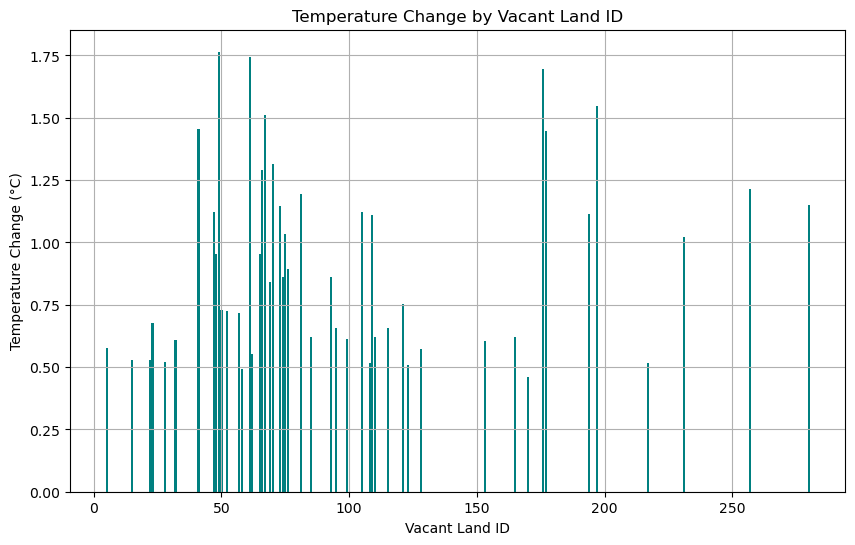

In [49]:
import pandas as pd

# Assuming 'results' is the list of dictionaries returned by your function
results_df = pd.DataFrame(results)

# Display the table in a clean format
print(results_df.to_string(index=False))
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(results_df['vacant_id'], results_df['temperature_change'], color='teal')
plt.xlabel('Vacant Land ID')
plt.ylabel('Temperature Change (°C)')
plt.title('Temperature Change by Vacant Land ID')
plt.grid(True)
plt.show()
